# Sentiment Analysis towards COVID-19 on Twitter

### Group Members

- **Xiao Chen** (z5545738)  
- **Hiking Shi** (z5467071)  
- **Kunisuke Ishigaki** (z5466173)  
- **Yuen Tak LI** (z5483312)  
- **Soo-Young Moon** (z5419507)  


### 1. Project Introduction

This project addresses the task of classifying the sentiment of tweets about the **COVID-19 pandemic** into three categories: **Positive**, **Negative**, and **Neutral**. The goal is to build an **accurate and versatile model** that can be leveraged in multiple contexts, providing valuable insights for:

- **Policy makers and businesses**: To guide strategic decisions based on public sentiment.
- **News organizations**: To inform and engage the community effectively.
- **Health and medical organizations**: To prioritize research and public health initiatives.

By evaluating several neural network models, this study aims to identify approaches that yield high accuracy under varying conditions, paving the way for broader applications in sentiment analysis and decision-making.

---

### Problem Statement

Sentiment analysis of social media has been a prominent task in recent years, offering insights into public opinion and the spread of information and misinformation. Social media has profoundly shaped public perceptions of **COVID-19**, serving as a platform for:

- **Quick Updates**: Sharing real-time news and reports.
- **Political Discussions**: Debating policies and responses.
- **Public Discourse**: Gauging societal attitudes and reactions.

### 2. Data Sources or RL Tasks

#### CovidSENTI  
*CovidSENTI* is a large-scale benchmark dataset for COVID-19 Sentiment Analysis.

- **Dataset URL**: [COVIDSenti GitHub Repository](https://github.com/usmaann/COVIDSenti)  
- **Dataset Paper**: [IEEE Explore Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9340540)

#### Task  
Classify the sentiment of tweets involving the COVID-19 pandemic into three classes:  
1. **Positive**  
2. **Negative**  
3. **Neutral**  


#### **content structure of tweets**

We select a few raw labeled tweets to analyze and find out tweets are often short, unstructured, and noisy. 

In [26]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

dataset_l = [
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-A.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-B.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-C.csv'
]
pd.set_option('display.max_colwidth', 200)
dataset_a = pd.read_csv(dataset_l[0])
dataset_a.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona virus \nswine flue \nBird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo",neu
2,"TLDR: Not SARS, possibly new coronavirus. Difficult to confirm because patients identified later in infection when‚Ä¶ https://t.co/utKo0fxdgX",neg
3,Disease outbreak news from the WHO: Middle East respiratory syndrome coronavirus (MERS-CoV) ‚Äì The United Arab Emira‚Ä¶ https://t.co/n89E94ZILj,neu
4,China - Media: WSJ says sources tell them mystery pneumonia is a new coronavirus - something that has been speculat‚Ä¶ https://t.co/3pJMDuiazw,neu


### 3. Exploratory Analysis of Data or RL Tasks


### 3.1. Data distribution among different labels in each sub-dataset

We observe class imbalance exists in every sub-dataset in the following cell, where each sub-dataset contains around 2000 positive tweets, 5000 negative tweets, and remaining majority is neutral tweets. In order to address the class imbalance issue, we may adopt two data sampling methods, oversampling and undersampling, which make dataset have the same number of tweets between different labels. 

In [20]:
for ddd in dataset_l:
    d_ = pd.read_csv(ddd)
    print(ddd.split("\\")[-1])
    print(d_['label'].value_counts())
    print('#'*50)                    


COVIDSenti.csv
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
##################################################
COVIDSenti-A.csv
label
neu    22949
neg     5083
pos     1968
Name: count, dtype: int64
##################################################
COVIDSenti-B.csv
label
neu    22496
neg     5471
pos     2033
Name: count, dtype: int64
##################################################
COVIDSenti-C.csv
label
neu    21940
neg     5781
pos     2279
Name: count, dtype: int64
##################################################


### 3.2. Most frequent words 

We compute the most frequent words in every dataset, plot the result in Fig. 1 and generate a word cloud in Fig. 2. We find out the top 20 frequent words in Fig. 1. This result gives us a brief summarization on what does tweets talk about. 

C:\Users\50643\COMP9444\Project\final_collection\methods\data_analysis.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(word_freq_df['Word'][:20], rotation=45)


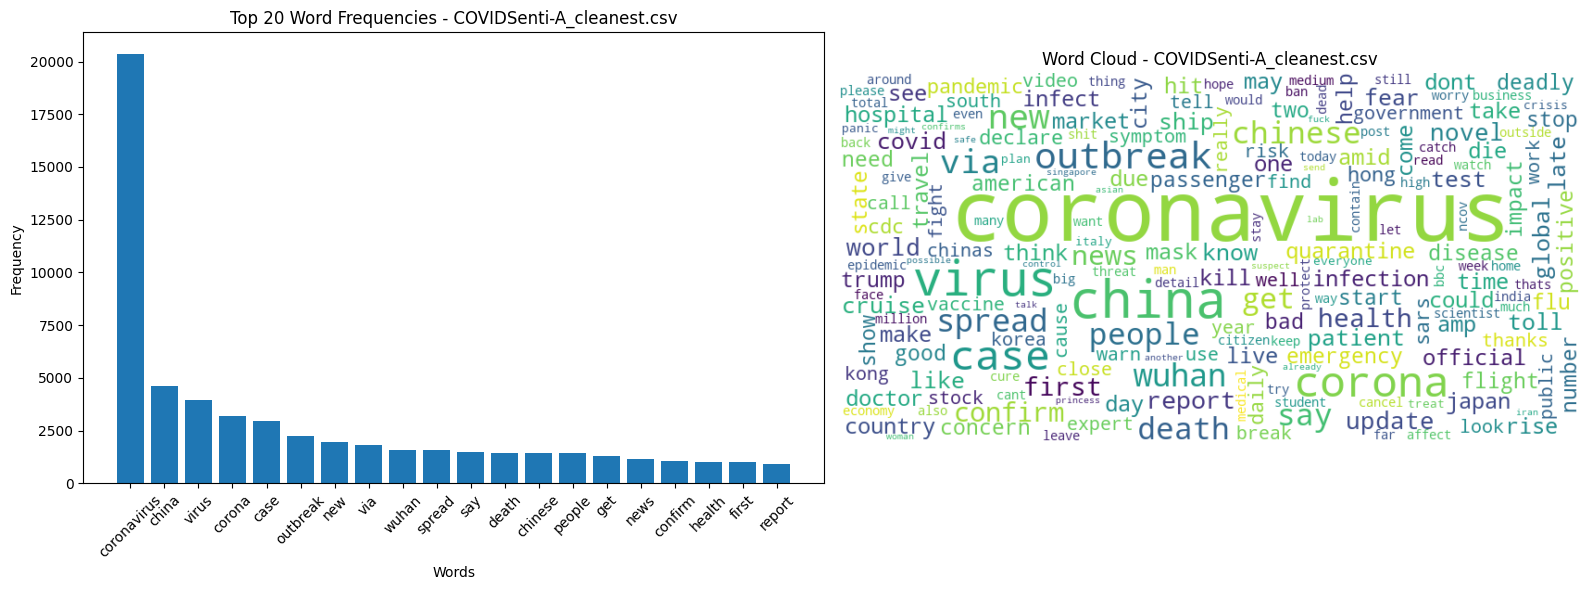

C:\Users\50643\COMP9444\Project\final_collection\methods\data_analysis.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(word_freq_df['Word'][:20], rotation=45)


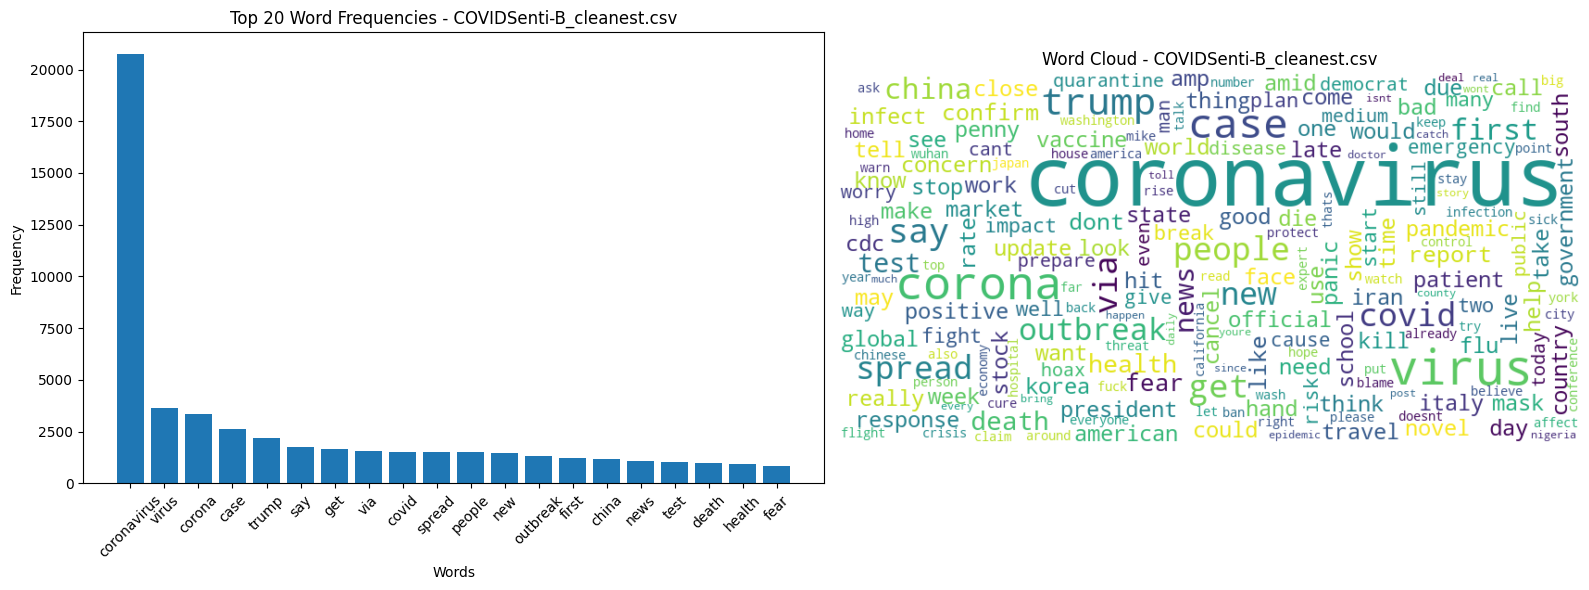

C:\Users\50643\COMP9444\Project\final_collection\methods\data_analysis.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(word_freq_df['Word'][:20], rotation=45)


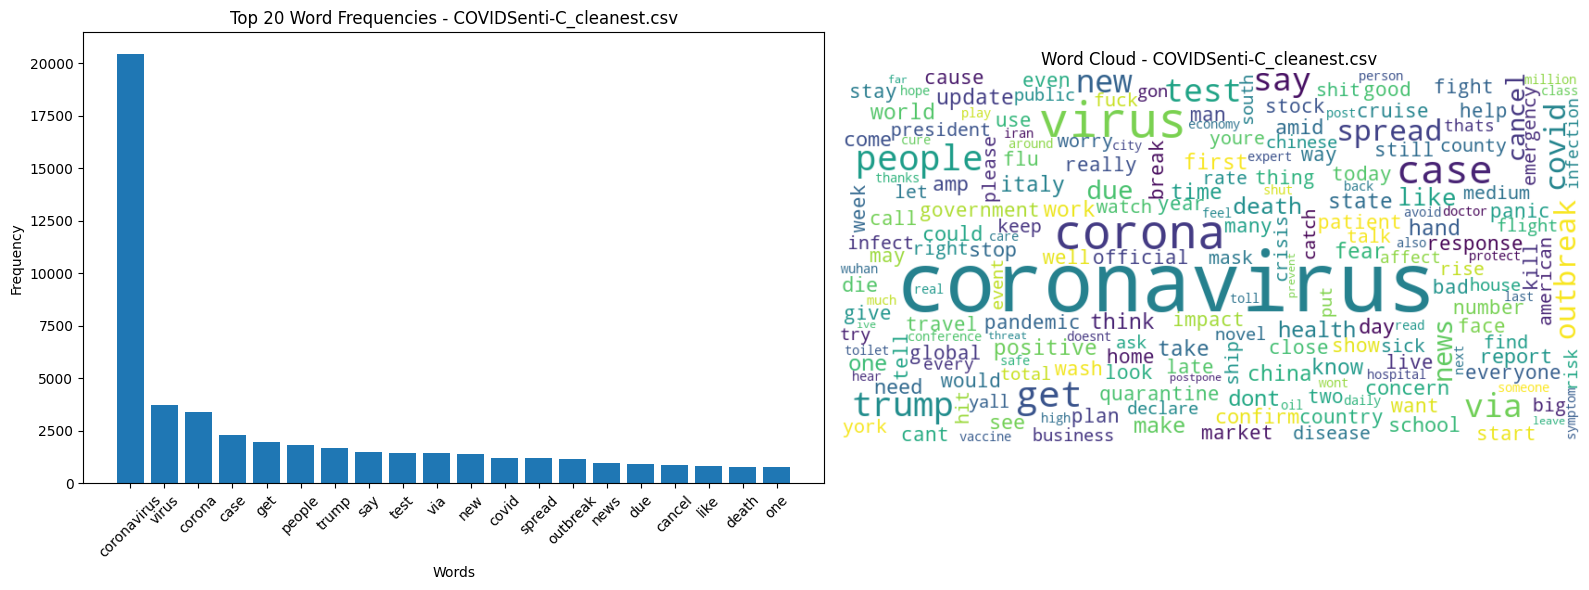

In [27]:
from methods.data_analysis import plot_hist_cloud

plot_l = [r'C:\Users\50643\COMP9444\Project\Data/final_dataset/COVIDSenti-A_cleanest.csv', 
          r'C:\Users\50643\COMP9444\Project\Data/final_dataset/COVIDSenti-B_cleanest.csv', 
          r'C:\Users\50643\COMP9444\Project\Data/final_dataset/COVIDSenti-C_cleanest.csv']
for i in plot_l:
    
    plot_hist_cloud(i)

### 3.3. Context structure of raw tweets 

We select a few raw labeled tweets to analyze and find out tweets are often short, unstructured, and noisy. We come up with two main problems among tweets which will be pre-processed before evaluation. The first problem is that we believe some context parts have no semantic value, these context parts are hyperlinks, Non-English words, Punctuations, Hashtags, @mentions, stop words, and numbers. The second problem is different word forms like different tenses or singular/plural should have the same semantic value and we should treat them as the same, e.g. “fails” and “fail”, “viruses” and “virus”, “treatments” and “treatment” etc. 

| **Problem**         | **Example**                   | **Problem**       | **Example**              |
|----------------------|-------------------------------|-------------------|--------------------------|
| **Hyperlinks**       | `https://t.co/40HoyXJ7KH`    | **@mentions**     | `@Plan_Prep_Live`        |
| **Non-English words**| `ÿßŸï¥ÑÉå`                   | **Word form**     | Fails: Tense <br> Viruses: Plural |
| **Punctuation**      | `"?", ",", "."`              | **Stop words**    | `a, and, the`            |
| **Hashtags**         | `#China #Wuhan #coronavirus` | **Number**        | `Over 200 cases`         |


In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

dataset_l = [
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-A.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-B.csv',
    r'C:\Users\50643\COMP9444\Project\Data\COVIDSenti-main\COVIDSenti-C.csv'
]
pd.set_option('display.max_colwidth', 200)
dataset_a = pd.read_csv(dataset_l[0])
dataset_a.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC https://t.co/IxoxVRarIb,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona virus \nswine flue \nBird flu in December when whole Pk is busy in Marriage‚Ä¶ https://t.co/6JWBIymnyo",neu
2,"TLDR: Not SARS, possibly new coronavirus. Difficult to confirm because patients identified later in infection when‚Ä¶ https://t.co/utKo0fxdgX",neg
3,Disease outbreak news from the WHO: Middle East respiratory syndrome coronavirus (MERS-CoV) ‚Äì The United Arab Emira‚Ä¶ https://t.co/n89E94ZILj,neu
4,China - Media: WSJ says sources tell them mystery pneumonia is a new coronavirus - something that has been speculat‚Ä¶ https://t.co/3pJMDuiazw,neu



### 3.4. Preprocessing Techniques

To handle the above data noise, we employ the following preprocessing methods:

1. **Remove Hyperlinks**  
   Strip out any URLs from the text to avoid irrelevant information affecting the sentiment.

2. **Language Filtering**  
   Filter out non-English words to focus on the targeted language for sentiment analysis.

3. **Punctuation Removal**  
   Remove unnecessary punctuation marks while retaining those critical for context, such as exclamation points.

4. **Hashtag Processing**  
   Extract hashtags for analysis or treat them as separate tokens to preserve their sentiment value.

5. **Handle Mentions**  
   Replace `@mentions` with a placeholder (e.g., `@user`) to anonymize and standardize the data.

6. **Normalize Word Forms**  
   Apply stemming or lemmatization to reduce words to their base forms (e.g., "fails" → "fail").

7. **Stop Word Removal**  
   Exclude common stop words (e.g., "a," "and," "the") that do not contribute meaningfully to sentiment.

8. **Number Standardization**  
   Convert numerical expressions into standard formats or placeholders (e.g., `200` → `<number>`).

---

### Combined, these preprocessing steps enhance the quality and consistency of the dataset, ensuring better performance in sentiment analysis tasks.


In [ ]:
from methods.preprocessing import preprocessing_dataset

''' If the variable is not written in the config dictionary, the default value only set lemma to 1 and r_emoji to 1
:param lemma: 1 means lemmatize is enabled
:param stem: 1 means stemming is enabled, you can use lemmatize and stemming at the same time, but it's not recommended. 
:param r_number: 1 means that all numbers are forcibly deleted.
:param r_emoji: 1 means retain the content after the hashtag.
:param hashtag: 1 means that the content after the hashtag is deleted. The default value 0 means that only the hashtag is deleted
:param r_repeated_chars: 1 means spelling correction and repetitive letter processing.  "coooool" -> "cool" (maybe not needed in models based on twitter)
:param r_special_chars: including ! " # $ % & \ ' ( ) * + , - . / : ; < = > ? @ [ \ \ ] ^ _ ` { | } ~ Ã ± ã ¼ â » §
:param eng_only: 1 means only Engilsh which means all other processing will be overwritten. (not recommended) 
'''

config = {
    "lemma": 1,
    "stem": 0,
    "r_number": 0,
    "r_emoji": 1,
    "hashtag": 0,
    "r_repeated_chars": 0,
    "r_special_chars": 0,
    "eng_only": 0
}

preprocessing_dataset(source='data/COVIDSenti-B.csv', target='test_dataset/B_base_lemmatize.csv', split_dataset=0.2, config_p=config)

### Dataset after preprocessing

In [29]:
df = pd.read_csv(plot_l[2])
df.head()

,Unnamed: 0,tweet,label,processed
0,0,"BREAKING: Kim Jong-un sends condolence letter to president Moon over coronavirus outbreak; wishes ""good health"" for South Koreans - Yonhap",pos,break kim jongun send condolence letter president moon coronavirus outbreak wish good health south korean yonhap
1,1,Coronavirus: Cases rise in South Korea as Australia imposes travel ban #Coronavirus https://t.co/SzLnoqxXG8,neu,coronavirus case rise south korea australia imposes travel ban
2,2,"How dangerous is coronavirus really, when are symptoms likely to appear, and who is most at risk of death? All you‚Ä¶ https://t.co/pGpOYtkk2n",neu,dangerous coronavirus really symptom likely appear risk death
3,3,@Dr_psychiatry Make a mark and also coronavirus proof,neu,make mark also coronavirus proof
4,4,"As #Coronavirus positive cases continues to rise, @_anishaj brings a list of compiled geographical data. https://t.co/0y7OMZOhYL",neu,positive case continue rise bring list compiled geographical data


#### Try to fix the imbalance

In [23]:
from methods import resampling

resampling.summon_samps(source=r'C:\Users\50643\COMP9444\Project\Data/final_dataset/COVIDSenti-C_cleanest.csv', target_root='results')

start with COVIDSenti-C_cleanest.csv
label
neu    21940
neg     5781
pos     2279
Name: count, dtype: int64
______________________________
label
pos    21940
neu    21940
neg    21940
Name: count, dtype: int64
______________________________
COVIDSenti-C_cleanest_over.csv
label
neg    2279
neu    2279
pos    2279
Name: count, dtype: int64
______________________________
COVIDSenti-C_cleanest_under.csv


### 4. **Models and/or Methods: Feature Extraction** and **Classification**

---

#### **Feature Extraction** ✨

To transform raw text data into structured feature representations, the following embedding techniques are employed:

- **Word2Vec** 🧠: Maps words into dense vector spaces based on their context within a sentence, preserving semantic similarity.
- **GloVe** 🌍: Generates word embeddings by capturing global co-occurrence statistics, emphasizing relationships between words across the entire corpus.
- **BERT** 🤖: Provides context-aware embeddings by analyzing bidirectional relationships between words in a sentence, enabling nuanced text understanding.

---

#### **Classification** 🎯

Features extracted from the text are passed through the following classifiers tailored for sequence and feature pattern recognition:

- **BiLSTM** 🔄: Captures dependencies from both past and future contexts in sequential data, enhancing prediction accuracy.
- **CNN** 🧩: Detects key patterns and n-grams in text, making it effective for identifying localized features.
- **BERTForSequenceClassification** 🚀: Fine-tunes the pre-trained BERT model specifically for sentiment classification, leveraging its rich contextual understanding for direct predictions.

---

#### **Baseline Model** 🏗️

In the baseline model, **Word2Vec** and **GloVe** are used for feature extraction, and **BiLSTM** is applied for prediction. The architecture consists of:

- **Two BiLSTM layers**: The first layer has 128 hidden units, and the second has 64 hidden units.
- **Dropout layers**: Each BiLSTM layer is followed by a dropout layer with a drop rate of 0.2 to prevent overfitting.
- **Softmax activation**: Calculates probabilities and predicts the output label.

**Early stopping** is applied based on the "validation_accuracy" metric. If "validation_accuracy" does not improve for three consecutive epochs, training stops, and evaluation begins.

---

#### **BERT-based Models** 💡

For enhanced performance in specific contexts, three specialized BERT-based models are utilized:

- **RoBERTa** 🔍: An optimized variant of BERT, trained on larger datasets with dynamic masking, designed to capture richer contextual relationships.
- **BERTweet** 🐦: A BERT-based model trained on large-scale Twitter data, adept at handling the unique linguistic characteristics and abbreviations commonly found in tweets.
- **CT-BERT** 🦠: Fine-tuned on COVID-19-related text, making it highly effective for sentiment and context analysis within pandemic-related discussions.

---

### **Transformer-based Model Parameters** ⚙️

The parameters for the transformer-based models are as follows:

| Model        | Sentence Length | Batch Size | Learning Rate | Epochs |
|--------------|-----------------|------------|---------------|--------|
| **BERT**     | 128             | 16         | 1e-5          | 10     |
| **RoBERTa**  | 128             | 16         | 1e-5          | 10     |
| **BERTweet** | 128             | 16         | 3e-5          | 10     |
| **CT-BERT** | 128             | 16         | 1e-5          | 10     |

---

### **Dataset Splitting** 📊

The dataset is divided into the following proportions:

- **70% for training** 🏋️: Used for model learning.
- **20% for testing** 🧪: Used for evaluating model performance.
- **10% for validation** 🔧: Used for fine-tuning hyperparameters and preventing overfitting.


####  **Because the training process is relatively long and the training environment is different, the final training results are presented in pictures**

In [2]:
def plot_training_results(image_path):

    img = Image.open(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

#### 🔍 Feature Extraction: **Word2Vec****

#### 📊 Classification: **BiLSTM**

Word2vec & BiLSTM can be found in methods/word2vec_bilstm.py, and results can be found in results/w2v_bilstm.ipynb


In [2]:
from methods.word2vec_bilstm import w2v_bilstm

data_path = r'‪C:\Users\50643\COMP9444\Project\Data\final_dataset\COVIDSenti-C_cleanest.csv'
df = pd.read_csv(data_path, encoding='utf-8')
w2v_bilstm(df) 

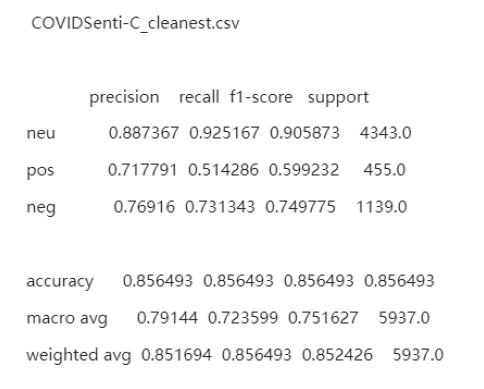

In [7]:
plot_training_results("results/word2vec_bilstm.jpg")


#### 🔍 Feature Extraction: **Glove**

#### 📊 Classification: **BiLSTM**

Glove & BiLSTM can be found in methods/glove_bilstm.py, and results can be found in results/glove_bilstm.ipynb

In [24]:
from methods.glove_bilstm import SentimentAnalysisModel

glove_path = r'G:\Coding\PycharmProject\pusht_formal\glove_space\model\glove.twitter.27B.200d.txt'
data_path = r'‪C:\Users\50643\COMP9444\Project\Data\final_dataset\COVIDSenti-C_cleanest.csv'

df = pd.read_csv(data_path)
df['label'] = df['label'].map({'neu': 0, 'pos': 1, 'neg': 2})
df.dropna(subset=['processed'], inplace=True)

sentiment_model = SentimentAnalysisModel(glove_path)

sentiment_model.run_pipeline(df)

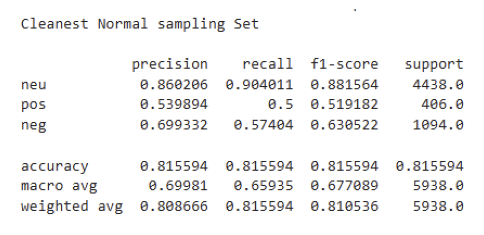

In [8]:
plot_training_results("results/glove_bilstm.jpg")

#### **To compare the baseline models’ performance, Word2Vec and Glove embeddings with BiLSTM have achieved at least 80% accuracy rate where Word2Vec embedding is performed slightly better than Glove embedding. When we analyze the f1-score among different classes, the performance in neutral class is around 0.9 while negative and positive classes are approximately 0.7 and 0.5.** 

#### 🔍 Feature Extraction: **BERT**

#### 📊 Classification: **BiLSTM**

BERT & BiLSTM can be found in methods/bert_bilstm.py

In [ ]:
from methods.bert_bilstm import bert_bilstm

bert_bilstm(data_path=r"C:/Users/50643/COMP9444/Project/Data/final_dataset/COVIDSenti-C_cleanest.csv", 
                num_epochs = 2, output_dir = "./sentiment_model_with_bert_bilstm")

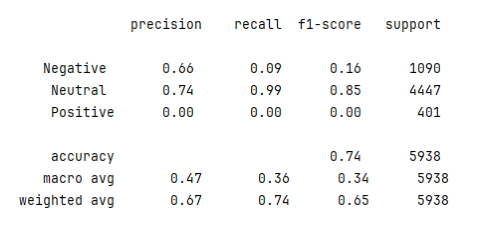

In [3]:
plot_training_results("results/BERT_bilstm.jpg")

**The precision, recall, and f1-score for the Positive category are all very low, especially in the first result, which has a recall of 0.00. This showed that the model was almost unable to correctly identify samples in the Positive category.**

**recall of Negative category is also low, especially 0.09 in the first result, indicating that the model missed most samples when predicting this category.**

**Model is heavily affected by data imbalances**

#### 🔍 Feature Extraction: **BERT**

#### 📊 Classification: **CNN**

BERT & CNN can be found in methods/bert_CNN.py

In [ ]:
from methods.bert_CNN import bert_cnn

bert_cnn(data_path=r"C:/Users/50643/COMP9444/Project/Data/final_dataset/COVIDSenti-C_cleanest.csv", 
         output_dir = "./sentiment_model_with_bert_bilstm", 
         num_epochs = 3)


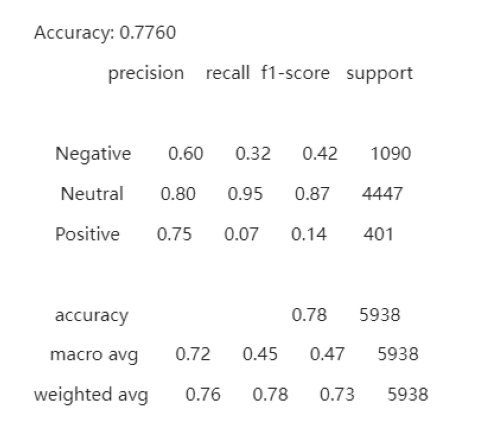

In [10]:
plot_training_results("results/BERT_cnn.jpg")

**The recall rate of the Negative category was only 0.32, and the Positive category was even worse, only 0.07. This indicates that the model fails to identify most of the actual negative and positive samples.**

**The F1-Score of Negative and Positive classes was 0.42 and 0.14, respectively, significantly lower than that of Neutral class (0.87), indicating that the overall prediction performance of the model was poor for a few classes.**

**BERT_CNN cannot effectively deal with the problem of data imbalance**

#### 🔍 Feature Extraction: **BERT**

#### 📊 Classification: **BERTForSequenceClassification**

End to end BERT can be found in methods/base_bert_bert.py

In [ ]:
from methods.base_bert_bert import bert_bert

bert_bert(dataset_path=r"C:/Users/50643/COMP9444/Project/Data/final_dataset/COVIDSenti-C_cleanest.csv",
          save_path="bert_bert", num_epochs=10)

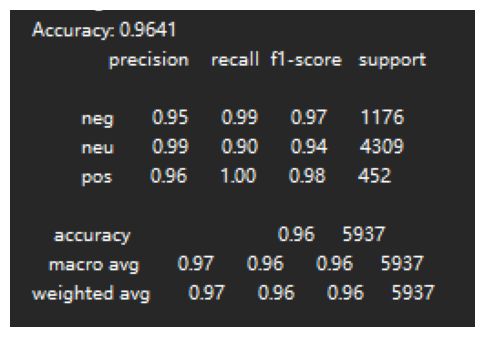

In [11]:
plot_training_results("results/BERT_.jpg")

### 🔬 **BERT Model Comparison Insights**

To compare the **BERT model** with different classification methods, we observe the following:

- **Integrating BERT with BiLSTM or CNN**:
  - Achieved an accuracy rate of only **~0.75**, which is **lower than our baseline models**.  
  - While their **f1-score** for the neutral class is satisfactory at around **0.85**, the scores for **negative** and **positive** classes are **unreasonably low**.

- **End-to-End BERT Model**:
  - Achieved **magnificent performance** with both accuracy and f1-scores reaching **0.95** across all classes.  

This demonstrates the superiority of the end-to-end BERT model for this task, showcasing its ability to deliver consistent and reliable results.


#### RoBERTa, BERTweet, CT-BERT


In [ ]:
!python methods/Bert-new/Bert/main.py roberta-base
# Accuracy: 0.7759. Only accuracy was recorded, other data (f1 score, confusion matrix) was lost.

In [ ]:
!python methods/Bert-new/Bert/main.py vinai/bertweet-base
# Accuracy: 0.9701. Only accuracy was recorded, other data (f1 score, confusion matrix) was lost.

In [ ]:
!python methods/Bert-new/Bert/main.py digitalepidemiologylab/covid-twitter-bert-v2
# Accuracy: 0.9745. Only accuracy was recorded, other data (f1 score, confusion matrix) was lost.

### 💬 **Discussion**

### 📊 **Impact of Data Preprocessing on Accuracy Performance**

Different data preprocessing techniques lead to varying accuracy outcomes. 

In the original paper **[Naseem, U., et al., 2021]**, COVID-19 sentiment analysis was conducted using:
- **Word2Vec embeddings with BiLSTM**  
- **GloVe embeddings with BiLSTM**  
- **End to end BERT model**

The reported accuracy rates for these models were **0.749**, **0.743**, and **0.932**, respectively. Unfortunately, our results across all models show slightly lower accuracy compared to the proposed models.

#### **Comparison of Preprocessing Techniques**
- Both approaches included the removal of:
  - **Hyperlinks**, **punctuations**, **hashtags**, **@mentions**, and **stop words**.  
  - Additionally, words were transformed into their root form.
- **Our approach**:  
  - We also removed **non-English words** and **numbers**, leading to better accuracy.  
  - This improvement is likely because non-English words and numbers act as **noisy data**, interfering with prediction in this classification task.

---

### ⚠️ **Underperformance of F1-Score in Negative and Positive Classes**

Across all proposed models using **BiLSTM** and **CNN** for classification:
- **F1-scores** for **negative** and **positive** classes are underperforming.  
- The majority **neutral** class shows consistent performance.

#### **Possible Causes**
- **Imbalanced Class Distribution**:
  - Insufficient features are extracted for negative and positive classes, resulting in:
    - Misclassification as other labels.
    - A tendency to classify as the **majority class**.
      
- **BERT with CNN or BiLSTM**:
  - These models perform poorly because BERT is designed as an **end-to-end model**.  
  - Integrating BERT with other classification methods limits the utility of the **transformer model**:
    - The high-dimensional semantic vector from BERT is not fully leveraged.
    - This leads to a **lower f1-score**.

- **Simplicity of the Task**:
   - After feature extraction with **BERT**, the resulting representation is already a high-dimensional semantic vector. For tasks like sentiment analysis (relatively simple classification), a **Sequence Classification (linear classifier)** is sufficient.

- **Mismatch of Model Complexity**:
   - Complex architectures like **CNN**, **RNNs**, or **BiLSTM** are better suited for tasks involving prediction or generation. In this context, their added complexity does not improve performance and may even hinder efficiency.

---

#### 🔍 Observations on Different BERT-based Models

#### 🚀 **RoBERTa**
- Utilizes a **dynamic masking mechanism** and a larger dataset (e.g., Wikipedia, BookCorpus), which enhances its robustness.
- However, during training:
  - **🐢 Low efficiency**: Loss reduction was very slow, likely due to the resource-intensive nature of RoBERTa.
  - **⚠️ Resource constraints**: Achieving optimal results with RoBERTa would require significantly more computational resources, which were unavailable.
- Training epochs for all models were capped at **10**, limiting the potential for improvement.

#### 🐦 **BERTweet**
- Pretrained specifically on **tweets**, making it more compatible with the characteristics of our dataset.

#### 🩺 **CT-BERT**
- Tailored for COVID-19-related text data, which aligns well with our training set.
- Produced **🌟 excellent results**, validating its suitability for the task.


### 📑 **Conclusions**

The final experimental results demonstrate that:  
- **Baseline Models**: Using **Word2Vec** and **GloVe embeddings** with **BiLSTM architecture** achieved satisfactory performance in most test cases.  
- **Transformer-based Models**: Models utilizing **BERT architecture** exhibited stronger performance in sentiment classification tasks compared to baseline models.  

However, our models were trained specifically on **Twitter data** collected during the COVID period. Therefore, it is inevitable that performance in sentiment analysis may vary when applying these models to datasets from different contexts and domains.

---

### 🔮 **Future Work**

1. **Evaluating Models’ Robustness**:  
   - We plan to test our models on diverse datasets, particularly **financial texts** such as **FOMC speeches**.

2. **Exploring Additional Transformer Architectures**:  
   - Future work will include testing **DistilBERT** and **XLNet**.  
   - This will allow us to:
     - Evaluate the **transferability** of our models.
     - Identify the **most optimal architectures** for sentiment analysis across varying contexts and domains.
. 